# **ANALYZING SUPPLY CHAIN DELIVERY AND TRANSPORTATION TRENDS THROUGH DATA CLEANING AND VISUALIZATION**

# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import json 

# **LOADING THE JSON FILE AND CONVERTING IT TO DATAFRAME**

In [2]:
with open("logistics_data_json.json") as f:
    data=json.load(f)
df=pd.DataFrame(data)

In [3]:
df.head(10)

,Shipment_ID,Ship_Date,Delivery_Date,Pickup_Location,Drop_Location,Transport_Cost,Status
0,SH1000,13-04-25 0:00,21-04-25,DL NCR,Delhi NCR,$53.40,ontime
1,SH1001,21-01-25 0:00,25-01-25,Bengaluru,MUM,â‚¹4926,On time
2,sh-1002,29-03-25 0:00,07-04-25,Delhi NCR,Bengaluru,630,OT
3,sh-1003,"Jan 02, 2025",11-01-25,Bengaluru,Bangalore,$36.66,late
4,SH1004,07-07-25,09-07-25,Bombay,Bangalore,"3885,00",Delayed
5,sh-1005,22-01-25 0:00,26-01-25,MUM,MUM,â‚¹1582,On time
6,ship1006,07-07-25,14-07-25,DL NCR,Mumbai,â‚¹3234,OT
7,sh-1007,20-02-25,28-02-25,Bengaluru,DL NCR,"1767,00",OT
8,sh-1008,"Feb 20, 2025",28-02-25,Mumbai,Hyderabad,$42.35,Delayed
9,sh-1009,16-06-25 0:00,18-06-25,Bangalore,DL NCR,â‚¹2863,120 min delay


In [4]:
df.shape

(500, 7)

# **RENAMING COLUMN NAMES**

In [5]:
df=df.rename(columns={
    "Ship_Date": "Shipping_Date",
    "Transport_Cost":"transportation_cost_$",
    "Status":"delivery_status"
})

In [6]:
df.head(5)

,Shipment_ID,Shipping_Date,Delivery_Date,Pickup_Location,Drop_Location,transportation_cost_$,delivery_status
0,SH1000,13-04-25 0:00,21-04-25,DL NCR,Delhi NCR,$53.40,ontime
1,SH1001,21-01-25 0:00,25-01-25,Bengaluru,MUM,â‚¹4926,On time
2,sh-1002,29-03-25 0:00,07-04-25,Delhi NCR,Bengaluru,630,OT
3,sh-1003,"Jan 02, 2025",11-01-25,Bengaluru,Bangalore,$36.66,late
4,SH1004,07-07-25,09-07-25,Bombay,Bangalore,"3885,00",Delayed


# **CLEANING COLUMN NAMES**

In [7]:
df.columns=df.columns.str.lower().str.replace(" ","_")

In [8]:
df.head(10)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,13-04-25 0:00,21-04-25,DL NCR,Delhi NCR,$53.40,ontime
1,SH1001,21-01-25 0:00,25-01-25,Bengaluru,MUM,â‚¹4926,On time
2,sh-1002,29-03-25 0:00,07-04-25,Delhi NCR,Bengaluru,630,OT
3,sh-1003,"Jan 02, 2025",11-01-25,Bengaluru,Bangalore,$36.66,late
4,SH1004,07-07-25,09-07-25,Bombay,Bangalore,"3885,00",Delayed
5,sh-1005,22-01-25 0:00,26-01-25,MUM,MUM,â‚¹1582,On time
6,ship1006,07-07-25,14-07-25,DL NCR,Mumbai,â‚¹3234,OT
7,sh-1007,20-02-25,28-02-25,Bengaluru,DL NCR,"1767,00",OT
8,sh-1008,"Feb 20, 2025",28-02-25,Mumbai,Hyderabad,$42.35,Delayed
9,sh-1009,16-06-25 0:00,18-06-25,Bangalore,DL NCR,â‚¹2863,120 min delay


# **CLEANING THE SHIPMENT ID COLUMN**

In [9]:
df["shipment_id"] = df["shipment_id"].astype(str)  # make sure it's string

In [10]:
df["shipment_id"]=df["shipment_id"].str.upper().str.replace("-","")

In [11]:
df["shipment_id"] = df["shipment_id"].str.replace(r"^SHIP", "SH", regex=True)  # replace SHIP with SH

In [12]:
df.head(10)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,13-04-25 0:00,21-04-25,DL NCR,Delhi NCR,$53.40,ontime
1,SH1001,21-01-25 0:00,25-01-25,Bengaluru,MUM,â‚¹4926,On time
2,SH1002,29-03-25 0:00,07-04-25,Delhi NCR,Bengaluru,630,OT
3,SH1003,"Jan 02, 2025",11-01-25,Bengaluru,Bangalore,$36.66,late
4,SH1004,07-07-25,09-07-25,Bombay,Bangalore,"3885,00",Delayed
5,SH1005,22-01-25 0:00,26-01-25,MUM,MUM,â‚¹1582,On time
6,SH1006,07-07-25,14-07-25,DL NCR,Mumbai,â‚¹3234,OT
7,SH1007,20-02-25,28-02-25,Bengaluru,DL NCR,"1767,00",OT
8,SH1008,"Feb 20, 2025",28-02-25,Mumbai,Hyderabad,$42.35,Delayed
9,SH1009,16-06-25 0:00,18-06-25,Bangalore,DL NCR,â‚¹2863,120 min delay


# **CLEANING THE SHIPMENT DATE COLUMN**

In [13]:
# Convert to datetime (ensure proper format)
df["shipping_date"] = pd.to_datetime(df["shipping_date"], errors="coerce", dayfirst=True)

# Keep only the date part (drops the time)
df["shipping_date"] = df["shipping_date"].dt.date

C:\Users\Aryansh Pathak\AppData\Local\Temp\ipykernel_7656\3433114884.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["shipping_date"] = pd.to_datetime(df["shipping_date"], errors="coerce", dayfirst=True)


In [14]:
df.head(5)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,2025-04-13,21-04-25,DL NCR,Delhi NCR,$53.40,ontime
1,SH1001,2025-01-21,25-01-25,Bengaluru,MUM,â‚¹4926,On time
2,SH1002,2025-03-29,07-04-25,Delhi NCR,Bengaluru,630,OT
3,SH1003,2025-01-02,11-01-25,Bengaluru,Bangalore,$36.66,late
4,SH1004,2025-07-07,09-07-25,Bombay,Bangalore,"3885,00",Delayed


# **CLEANING THE PICKUP LOCATION COLUMN**

In [15]:
df["pickup_location"].unique()

array(['DL NCR', 'Bengaluru', 'Delhi NCR', 'Bombay', 'MUM', 'Mumbai',
       'Bangalore', 'New Delhi', 'Chennai', 'BLR', 'Hyderabad'],
      dtype=object)

In [16]:
df["pickup_location"]=df["pickup_location"].replace({"DL NCR":"Delhi NCR",
                                                        "Bombay":"Mumbai",
                                                        "MUM":"Mumbai",
                                                        "Bangalore":"Bengaluru",
                                                        "BLR":"Bengaluru"})

In [17]:
df["pickup_location"].unique()

array(['Delhi NCR', 'Bengaluru', 'Mumbai', 'New Delhi', 'Chennai',
       'Hyderabad'], dtype=object)

In [18]:
df.head(10)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,2025-04-13,21-04-25,Delhi NCR,Delhi NCR,$53.40,ontime
1,SH1001,2025-01-21,25-01-25,Bengaluru,MUM,â‚¹4926,On time
2,SH1002,2025-03-29,07-04-25,Delhi NCR,Bengaluru,630,OT
3,SH1003,2025-01-02,11-01-25,Bengaluru,Bangalore,$36.66,late
4,SH1004,2025-07-07,09-07-25,Mumbai,Bangalore,"3885,00",Delayed
5,SH1005,2025-01-22,26-01-25,Mumbai,MUM,â‚¹1582,On time
6,SH1006,2025-07-07,14-07-25,Delhi NCR,Mumbai,â‚¹3234,OT
7,SH1007,2025-02-20,28-02-25,Bengaluru,DL NCR,"1767,00",OT
8,SH1008,2025-02-20,28-02-25,Mumbai,Hyderabad,$42.35,Delayed
9,SH1009,2025-06-16,18-06-25,Bengaluru,DL NCR,â‚¹2863,120 min delay


# **CLEANING THE DROP LOCATION COLUMN**

In [19]:
df["drop_location"].unique()

array(['Delhi NCR', 'MUM', 'Bengaluru', 'Bangalore', 'Mumbai', 'DL NCR',
       'Hyderabad', 'New Delhi', 'BLR', 'Chennai', 'Bombay'], dtype=object)

In [20]:
df["drop_location"]=df["drop_location"].replace({"DL NCR":"Delhi NCR",
                                                 "Bombay":"Mumbai",
                                                 "MUM":"Mumbai",
                                                 "Bangalore":"Bengaluru",
                                                 "BLR":"Bengaluru"})

In [21]:
df["drop_location"].unique()

array(['Delhi NCR', 'Mumbai', 'Bengaluru', 'Hyderabad', 'New Delhi',
       'Chennai'], dtype=object)

In [22]:
df.head(10)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,2025-04-13,21-04-25,Delhi NCR,Delhi NCR,$53.40,ontime
1,SH1001,2025-01-21,25-01-25,Bengaluru,Mumbai,â‚¹4926,On time
2,SH1002,2025-03-29,07-04-25,Delhi NCR,Bengaluru,630,OT
3,SH1003,2025-01-02,11-01-25,Bengaluru,Bengaluru,$36.66,late
4,SH1004,2025-07-07,09-07-25,Mumbai,Bengaluru,"3885,00",Delayed
5,SH1005,2025-01-22,26-01-25,Mumbai,Mumbai,â‚¹1582,On time
6,SH1006,2025-07-07,14-07-25,Delhi NCR,Mumbai,â‚¹3234,OT
7,SH1007,2025-02-20,28-02-25,Bengaluru,Delhi NCR,"1767,00",OT
8,SH1008,2025-02-20,28-02-25,Mumbai,Hyderabad,$42.35,Delayed
9,SH1009,2025-06-16,18-06-25,Bengaluru,Delhi NCR,â‚¹2863,120 min delay


# **CLEANING THE TRANSPORTATION COST COLUMN**

In [23]:
df["transportation_cost_$"] = df["transportation_cost_$"].astype(str)  # Ensure string

In [24]:
#replacing commas with decimal
df["transportation_cost_$"]=df["transportation_cost_$"].str.replace(",",".")

In [25]:
# 1. Remove unwanted characters (like $, â, spaces)
df["transportation_cost_$"] = df["transportation_cost_$"].str.replace(r"[^\d.]", "", regex=True)

# 2. Convert to float
df["transportation_cost_$"] = pd.to_numeric(df["transportation_cost_$"], errors="coerce")

In [26]:
df.head(10)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,2025-04-13,21-04-25,Delhi NCR,Delhi NCR,53.40,ontime
1,SH1001,2025-01-21,25-01-25,Bengaluru,Mumbai,4926.00,On time
2,SH1002,2025-03-29,07-04-25,Delhi NCR,Bengaluru,630.00,OT
3,SH1003,2025-01-02,11-01-25,Bengaluru,Bengaluru,36.66,late
4,SH1004,2025-07-07,09-07-25,Mumbai,Bengaluru,3885.00,Delayed
5,SH1005,2025-01-22,26-01-25,Mumbai,Mumbai,1582.00,On time
6,SH1006,2025-07-07,14-07-25,Delhi NCR,Mumbai,3234.00,OT
7,SH1007,2025-02-20,28-02-25,Bengaluru,Delhi NCR,1767.00,OT
8,SH1008,2025-02-20,28-02-25,Mumbai,Hyderabad,42.35,Delayed
9,SH1009,2025-06-16,18-06-25,Bengaluru,Delhi NCR,2863.00,120 min delay


# **CLEANING THE DELIVERY STATUS COLUMN**

In [27]:
df["delivery_status"].unique()

array(['ontime', 'On time', 'OT', 'late', 'Delayed', '120 min delay'],
      dtype=object)

In [28]:
df["delivery_status"]=df["delivery_status"].replace({"ontime":"on_time",
                                                 "On time":"on_time",
                                                 "OT":"on_time",
                                                 "Delayed":"delayed",
                                                 "120 min delay":"delay_greater_than_2_hr"})

In [29]:
df.head(10)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,2025-04-13,21-04-25,Delhi NCR,Delhi NCR,53.40,on_time
1,SH1001,2025-01-21,25-01-25,Bengaluru,Mumbai,4926.00,on_time
2,SH1002,2025-03-29,07-04-25,Delhi NCR,Bengaluru,630.00,on_time
3,SH1003,2025-01-02,11-01-25,Bengaluru,Bengaluru,36.66,late
4,SH1004,2025-07-07,09-07-25,Mumbai,Bengaluru,3885.00,delayed
5,SH1005,2025-01-22,26-01-25,Mumbai,Mumbai,1582.00,on_time
6,SH1006,2025-07-07,14-07-25,Delhi NCR,Mumbai,3234.00,on_time
7,SH1007,2025-02-20,28-02-25,Bengaluru,Delhi NCR,1767.00,on_time
8,SH1008,2025-02-20,28-02-25,Mumbai,Hyderabad,42.35,delayed
9,SH1009,2025-06-16,18-06-25,Bengaluru,Delhi NCR,2863.00,delay_greater_than_2_hr


# **CONVERTING DATASET TO CSV FILE**

In [30]:
# Save DataFrame as CSV
df.to_csv("supply_chain_analytics_dataset.csv", index=False)

# **VISUALISING THE DATASET**

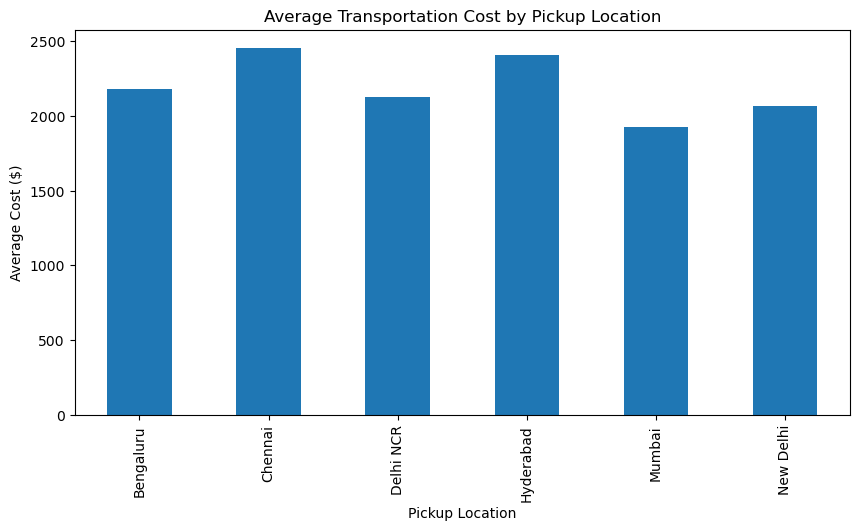

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

df.groupby("pickup_location")["transportation_cost_$"].mean().plot(kind="bar", figsize=(10,5))
plt.title("Average Transportation Cost by Pickup Location")
plt.ylabel("Average Cost ($)")
plt.xlabel("Pickup Location")
plt.show()

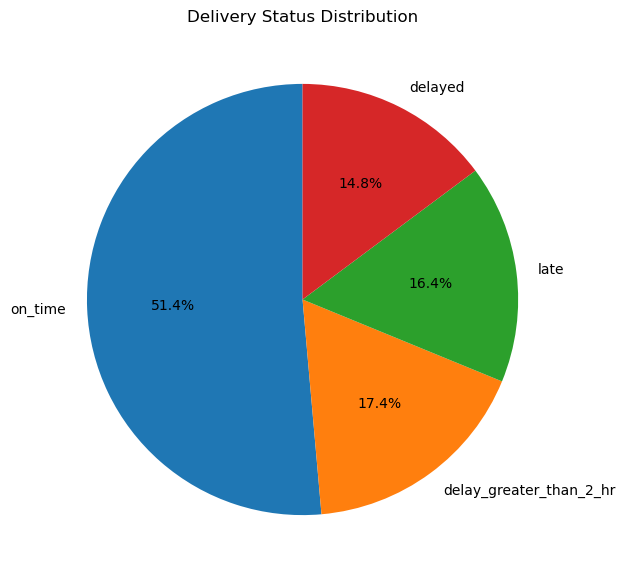

In [32]:
df["delivery_status"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(7,7), startangle=90)
plt.title("Delivery Status Distribution")
plt.ylabel("")
plt.show()

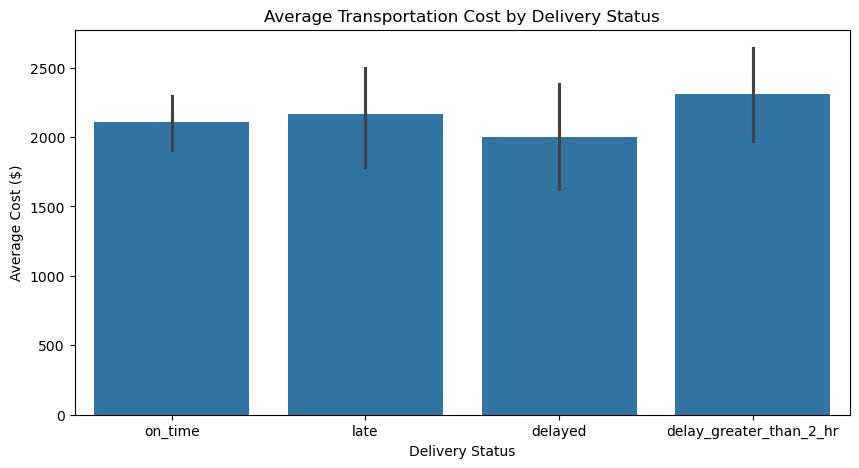

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x="delivery_status", y="transportation_cost_$", data=df)
plt.title("Average Transportation Cost by Delivery Status")
plt.ylabel("Average Cost ($)")
plt.xlabel("Delivery Status")
plt.show()

In [34]:
df.head(5)

,shipment_id,shipping_date,delivery_date,pickup_location,drop_location,transportation_cost_$,delivery_status
0,SH1000,2025-04-13,21-04-25,Delhi NCR,Delhi NCR,53.40,on_time
1,SH1001,2025-01-21,25-01-25,Bengaluru,Mumbai,4926.00,on_time
2,SH1002,2025-03-29,07-04-25,Delhi NCR,Bengaluru,630.00,on_time
3,SH1003,2025-01-02,11-01-25,Bengaluru,Bengaluru,36.66,late
4,SH1004,2025-07-07,09-07-25,Mumbai,Bengaluru,3885.00,delayed


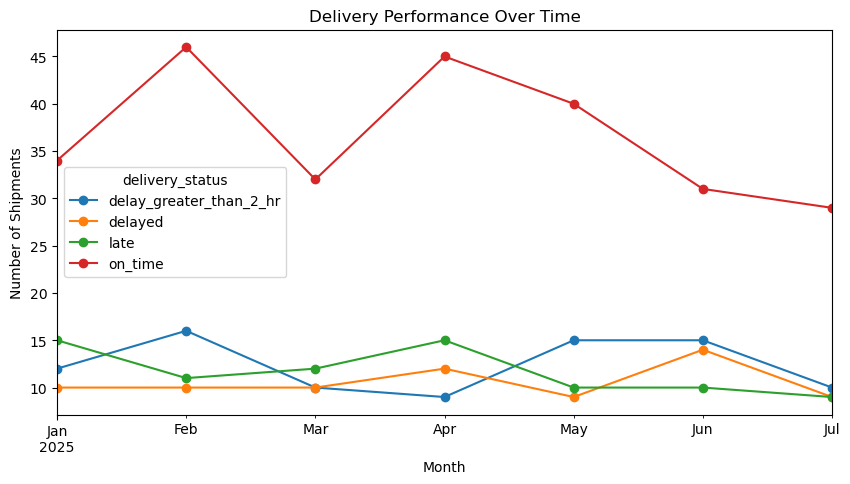

In [35]:
# Convert shipping_date to datetime
df["shipping_date"] = pd.to_datetime(df["shipping_date"], errors="coerce")

# Now extract month period
df["month"] = df["shipping_date"].dt.to_period("M")

# Group by month and delivery_status
status_trend = df.groupby(["month", "delivery_status"]).size().unstack()

# Plot
status_trend.plot(kind="line", marker="o", figsize=(10,5))
plt.title("Delivery Performance Over Time")
plt.ylabel("Number of Shipments")
plt.xlabel("Month")
plt.show()
